### Importing Libraries

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### About Data

Customers are asked to rate the store out of 10 i.e. **"satisfaction" point** given by the customers to the store. Using an algorithm, store gives **"Loyalty points"** to customers based on the no. of items purchased by them in the last year + the amount of money spent by them in the store. 

### Loading Data

In [283]:
data = pd.read_csv('C:\\Users\\dell\\Desktop\\market_data.csv')

### Data Exploration

In [284]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Satisfaction    30 non-null int64
Loyalty         30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [286]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


#### Let's plot

Text(0,0.5,'Loyalty')

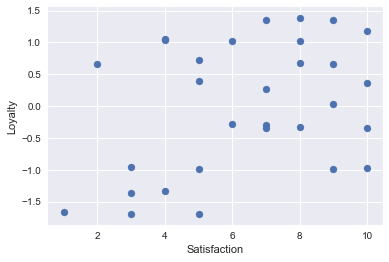

In [287]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Preparing input data

In [288]:
from sklearn import preprocessing
data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# <font color = "green">Mean-Shift Clustering</font>

### Selecting Band-width

In [332]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(data_scaled, quantile=0.3)

In [333]:
bandwidth

1.2909951858425464

### Training Model

In [327]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth)
clustering.fit(data_scaled)

MeanShift(bandwidth=1.2909951858425464, bin_seeding=False, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

### Clustering Labels

In [336]:
clustering.labels_

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [337]:
cluster_data= data.copy()
cluster_data['cluster_pred'] = clustering.fit_predict(data_scaled)

In [338]:
 cluster_data

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


### Visualisation

Text(0,0.5,'Loyalty')

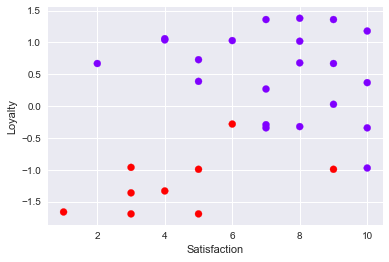

In [331]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c = cluster_data['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**Keep Following and Practice more :)**

**GeeksforGeeks**